In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/datasets/new_data.csv'
new_data = pd.read_csv(data_path)

In [ ]:
new_data.shape

(324844, 15)

In [ ]:
new_data['Is Fraud?'].value_counts()

,count
Is Fraud?,
No,324625
Yes,219


In [ ]:
for col in new_data.columns:
    print('{}: {}'.format(col, new_data[col].nunique()))

User: 1881
Card: 9
Year: 30
Month: 12
Day: 31
Time: 1440
Amount: 22302
Use Chip: 2
Merchant Name: 19144
Merchant City: 6887
Merchant State: 51
Zip: 13590
MCC: 103
Errors?: 13
Is Fraud?: 2


In [ ]:
columns = ['User', 'Card', 'Year', 'Month', 'Day', 'Use Chip', 'Is Fraud?']
for col in columns:
    print('{}: {}'.format(col, new_data[col].unique()))

User: [   0    1    2 ... 1997 1998 1999]
Card: [0 1 2 3 4 5 6 7 8]
Year: [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 1999 2000 2001 1998 1996 1997 1994 1995 1991
 1992 1993]
Month: [ 9  1  3  4  5  6  7 10 11 12  8  2]
Day: [ 9 12 17 20 29 30  2 31 10 15  1 21 25 28  7  3 23 13 18 27  6  8 14 22
 24  5 16  4 11 19 26]
Use Chip: ['Swipe Transaction' 'Chip Transaction']
Is Fraud?: ['No' 'Yes']


In [ ]:
# replace $ in Amount column with space (extract only numbers)
new_data['Amount'] = new_data['Amount'].str.replace('$', '').astype('float')

In [ ]:
new_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,9,09:40,65.50,Swipe Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,Technical Glitch,No
1,0,0,2002,9,12,06:21,122.10,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,Insufficient Balance,No
2,0,0,2002,9,17,06:09,120.19,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,Insufficient Balance,No
3,0,0,2002,9,20,06:01,104.77,Swipe Transaction,-245178307025547046,La Verne,CA,91750.0,5311,Insufficient Balance,No
4,0,0,2002,9,29,06:06,119.61,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,Insufficient Balance,No


In [ ]:
new_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,9,09:40,65.50,Swipe Transaction,-3345936507911876459,La Verne,CA,91750.0,7538,Technical Glitch,No
1,0,0,2002,9,12,06:21,122.10,Swipe Transaction,4060646732831064559,La Verne,CA,91750.0,5411,Insufficient Balance,No
2,0,0,2002,9,17,06:09,120.19,Swipe Transaction,-34551508091458520,La Verne,CA,91750.0,5912,Insufficient Balance,No
3,0,0,2002,9,20,06:01,104.77,Swipe Transaction,-245178307025547046,La Verne,CA,91750.0,5311,Insufficient Balance,No
4,0,0,2002,9,29,06:06,119.61,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,Insufficient Balance,No


In [ ]:
# drop the Merchant Name column
new_data.drop('Merchant Name', axis=1, inplace=True)

In [ ]:
# label encoding Encoding for the target column
new_data['Is Fraud?'] = new_data['Is Fraud?'].map({'Yes':1, 'No':0})

In [ ]:
new_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,9,09:40,65.50,Swipe Transaction,La Verne,CA,91750.0,7538,Technical Glitch,0
1,0,0,2002,9,12,06:21,122.10,Swipe Transaction,La Verne,CA,91750.0,5411,Insufficient Balance,0
2,0,0,2002,9,17,06:09,120.19,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0
3,0,0,2002,9,20,06:01,104.77,Swipe Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,0
4,0,0,2002,9,29,06:06,119.61,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0


In [ ]:
new_data['Use Chip'].unique()

array(['Swipe Transaction', 'Chip Transaction'], dtype=object)

In [ ]:
new_data['Merchant City'].unique()

array(['La Verne', 'Mira Loma', 'Carrizo Springs', ..., 'Jenkintown',
       'King Of Prussia', 'Star City'], dtype=object)

In [ ]:
new_data['Merchant State'].unique()

array(['CA', 'TX', 'NJ', 'UT', 'FL', 'NV', 'HI', 'NY', 'MA', 'MI', 'MN',
       'IA', 'IL', 'WA', 'SC', 'AK', 'CO', 'NC', 'OH', 'ME', 'MO', 'PA',
       'AR', 'GA', 'CT', 'AZ', 'DC', 'KY', 'AL', 'OR', 'WI', 'IN', 'MD',
       'VA', 'TN', 'LA', 'RI', 'OK', 'KS', 'ND', 'NM', 'MS', 'NH', 'NE',
       'WV', 'ID', 'DE', 'WY', 'SD', 'MT', 'VT'], dtype=object)

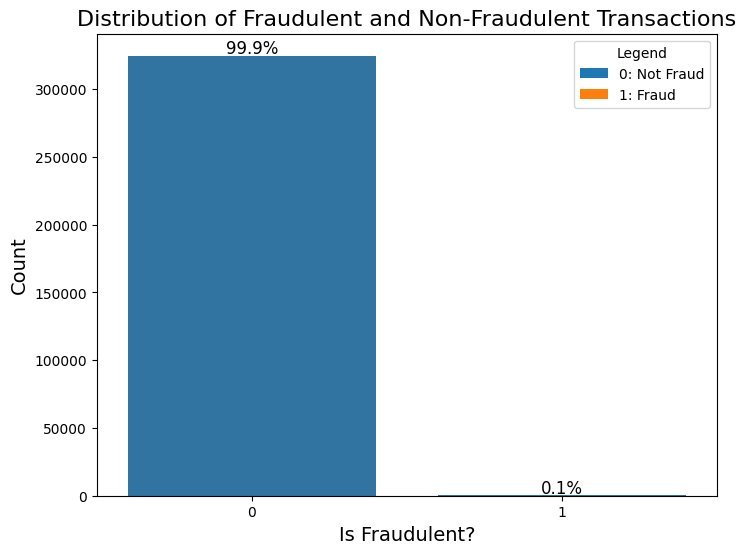

In [ ]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Is Fraud?', data=new_data)

# Add percentage labels above the bars
total = len(new_data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set the title and labels
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions', fontsize=16)
plt.xlabel('Is Fraudulent?', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add the custom legend box
plt.legend(handles=[plt.Rectangle((0, 0), 1, 1, fc="#1f77b4"), plt.Rectangle((0, 0), 1, 1, fc="#ff7f0e")],
           labels=['0: Not Fraud', '1: Fraud'], title="Legend", loc='upper right')

# Display the plot
plt.show()

In [ ]:
fraud_data = new_data[new_data['Is Fraud?'] == 1]
fraud_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
3151,17,2,2007,6,30,16:15,5.40,Swipe Transaction,Bloomville,OH,44818.0,5499,Bad PIN,1
3152,17,2,2007,7,5,09:54,165.17,Swipe Transaction,Bucyrus,OH,44820.0,4829,Bad PIN,1
5359,29,3,2012,7,15,19:37,96.18,Swipe Transaction,Madison,TN,37115.0,5300,Bad PIN,1
5476,31,3,2006,1,12,15:32,76.65,Swipe Transaction,Fort Lauderdale,FL,33309.0,4814,Bad PIN,1
6222,36,2,2013,10,4,06:32,843.13,Swipe Transaction,Strasburg,OH,44680.0,7549,Bad PIN,1


In [ ]:
numerical_col = fraud_data.select_dtypes(include=['int', 'float'])
numerical_col

,User,Card,Year,Month,Day,Amount,Zip,MCC,Is Fraud?
3151,17,2,2007,6,30,5.40,44818.0,5499,1
3152,17,2,2007,7,5,165.17,44820.0,4829,1
5359,29,3,2012,7,15,96.18,37115.0,5300,1
5476,31,3,2006,1,12,76.65,33309.0,4814,1
6222,36,2,2013,10,4,843.13,44680.0,7549,1
...,...,...,...,...,...,...,...,...,...
309878,1908,3,2006,1,10,4.01,28105.0,7922,1
312751,1926,4,2015,4,19,303.86,28163.0,5310,1
313432,1931,4,2008,2,2,70.03,56721.0,5094,1
313682,1932,1,2014,3,2,107.51,44680.0,5300,1


In [ ]:
categorical_col = list(new_data.select_dtypes(include=object).columns)
categorical_col

['Time', 'Use Chip', 'Merchant City', 'Merchant State', 'Errors?']

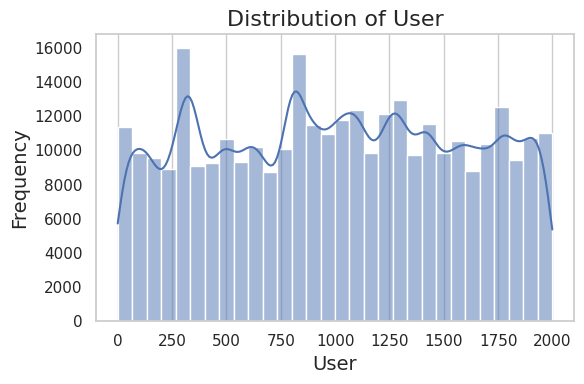

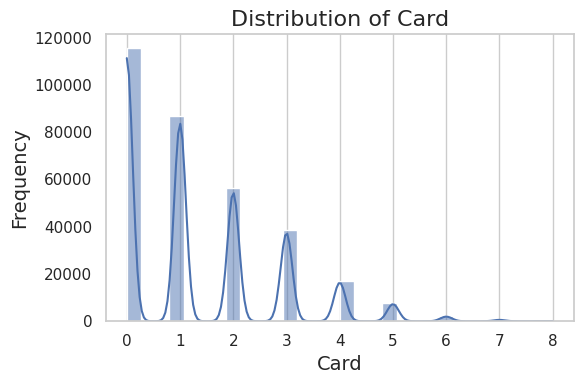

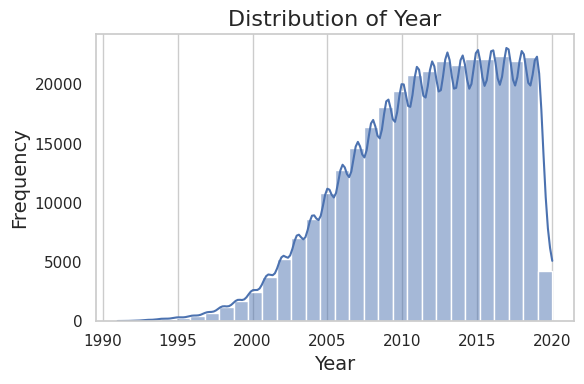

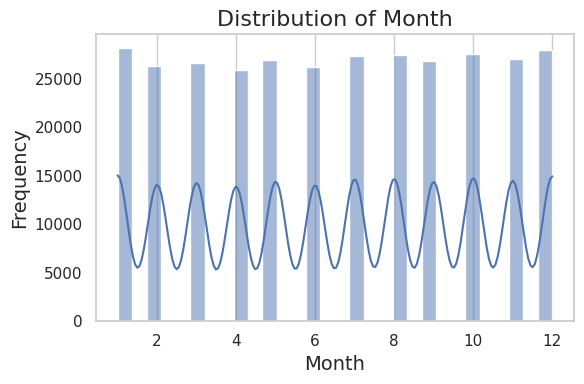

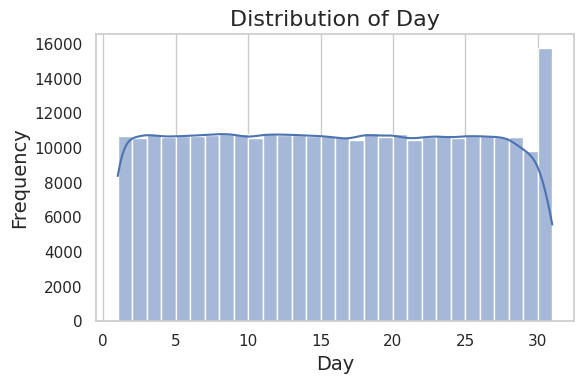

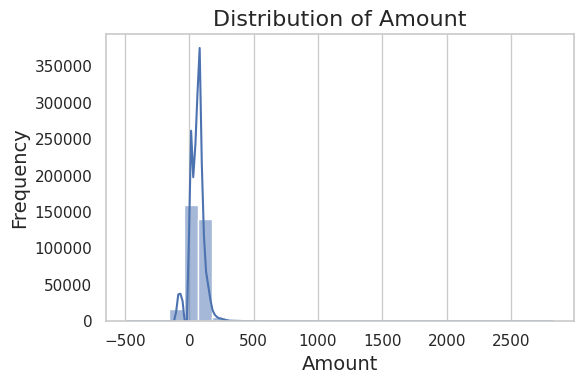

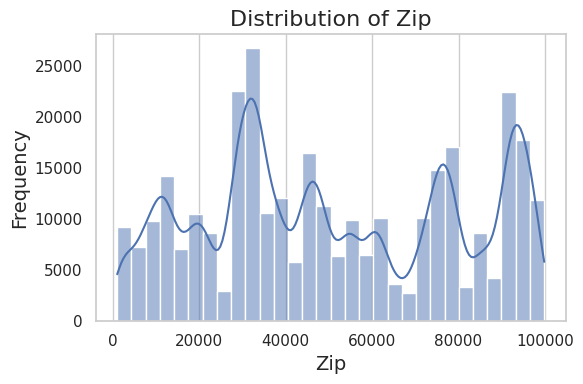

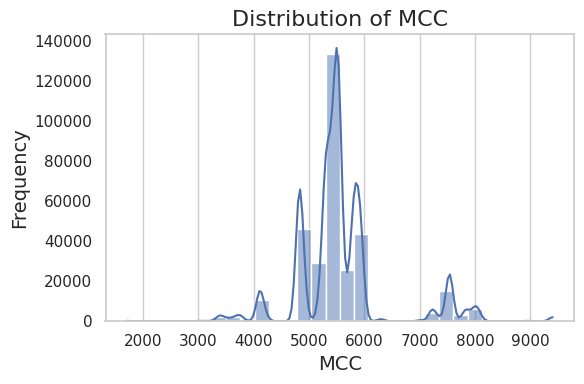

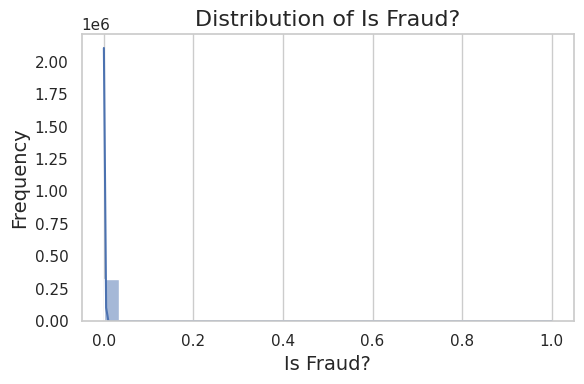

In [ ]:
sns.set(style='whitegrid')

for col in numerical_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(new_data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

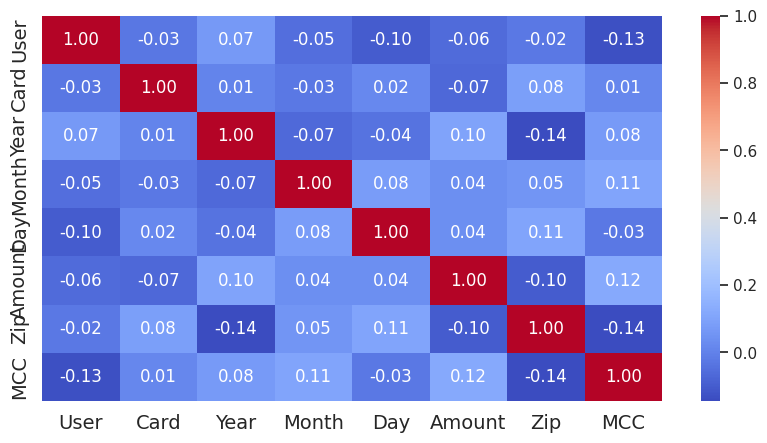

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(fraud_data.drop(['Is Fraud?'],axis=1).select_dtypes(include=['int', 'float']).corr(),annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# # Plot a heatmap to visualize correlations between columns
# plt.figure(figsize=(10, 10))
# sns.heatmap(numeric_col.corr(), annot=True, cmap='coolwarm', fmt='.2f')
# plt.show()

In [ ]:
new_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,9,09:40,65.50,Swipe Transaction,La Verne,CA,91750.0,7538,Technical Glitch,0
1,0,0,2002,9,12,06:21,122.10,Swipe Transaction,La Verne,CA,91750.0,5411,Insufficient Balance,0
2,0,0,2002,9,17,06:09,120.19,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0
3,0,0,2002,9,20,06:01,104.77,Swipe Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,0
4,0,0,2002,9,29,06:06,119.61,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0


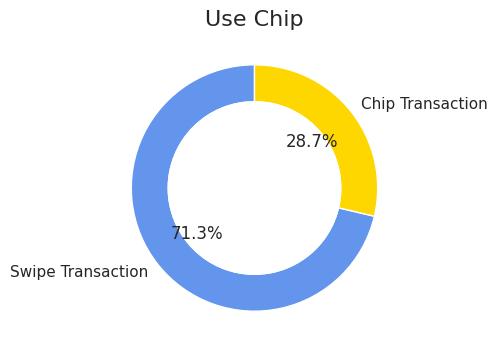

In [ ]:
chip_data = new_data['Use Chip'].value_counts()

# Creating a donut chart
plt.figure(figsize=(8, 4))
plt.pie(chip_data, labels=chip_data.index, autopct='%1.1f%%', startangle=90, colors=['#6495ED', '#FFD700'],
        wedgeprops={'width': 0.3, 'edgecolor': 'w'})

# Adding a circle at the center to turn the pie chart into a donut chart
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))

plt.title('Use Chip', loc='center', fontsize=16)
plt.show()


In [ ]:
new_data.groupby('Is Fraud?')['Use Chip'].value_counts()

Is Fraud?  Use Chip         
0          Swipe Transaction    231468
           Chip Transaction      93157
1          Swipe Transaction       203
           Chip Transaction         16
Name: count, dtype: int64

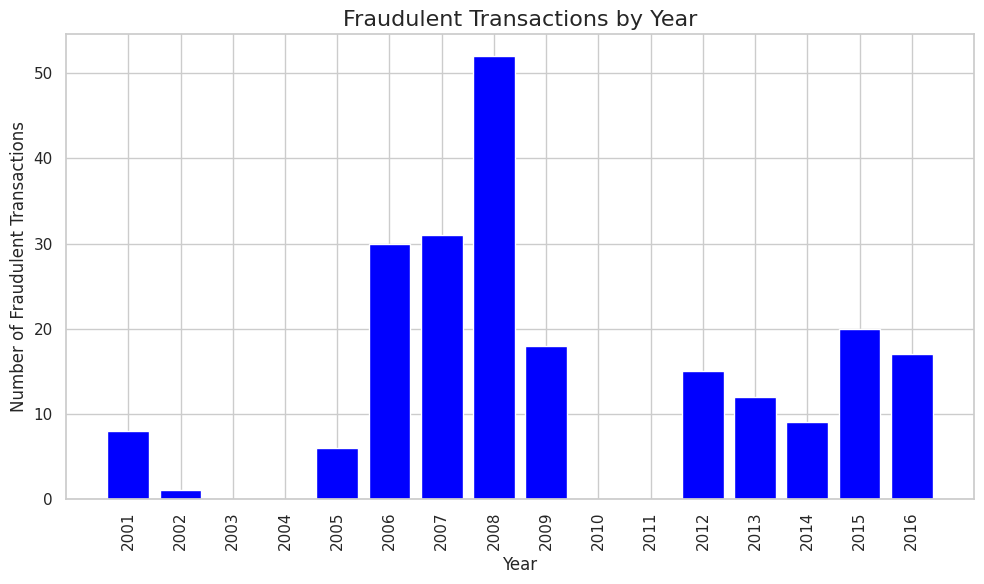

In [ ]:
fraud_by_year = fraud_data['Year'].value_counts().sort_index()

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(fraud_by_year.index, fraud_by_year.values, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12)
plt.title('Fraudulent Transactions by Year', fontsize=16)
plt.xticks(np.arange(fraud_by_year.index.min(), fraud_by_year.index.max() + 1, 1), rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
fraud_data.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
3151,17,2,2007,6,30,16:15,5.40,Swipe Transaction,Bloomville,OH,44818.0,5499,Bad PIN,1
3152,17,2,2007,7,5,09:54,165.17,Swipe Transaction,Bucyrus,OH,44820.0,4829,Bad PIN,1
5359,29,3,2012,7,15,19:37,96.18,Swipe Transaction,Madison,TN,37115.0,5300,Bad PIN,1
5476,31,3,2006,1,12,15:32,76.65,Swipe Transaction,Fort Lauderdale,FL,33309.0,4814,Bad PIN,1
6222,36,2,2013,10,4,06:32,843.13,Swipe Transaction,Strasburg,OH,44680.0,7549,Bad PIN,1


<ipython-input-29-e570308c0f24>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, y='Merchant City', order=top_cities, edgecolor='black', palette='viridis')


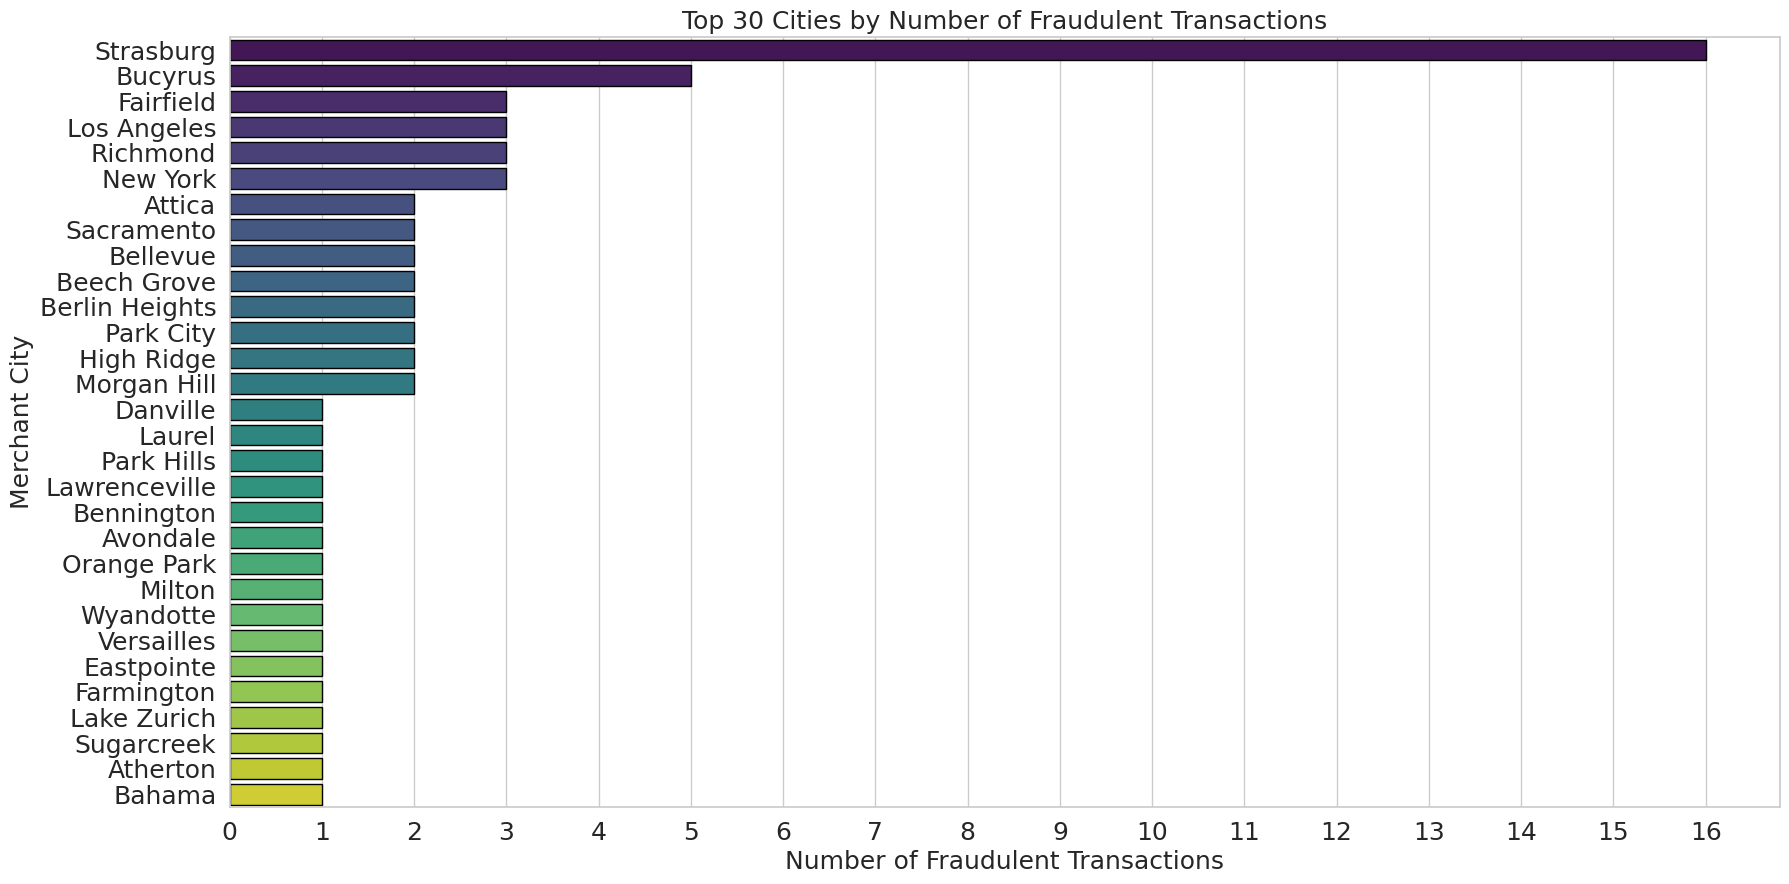

In [ ]:
top_cities = fraud_data['Merchant City'].value_counts().head(30).index

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

sns.countplot(data=fraud_data, y='Merchant City', order=top_cities, edgecolor='black', palette='viridis')

plt.title('Top 30 Cities by Number of Fraudulent Transactions', fontsize=18)
plt.xlabel("Number of Fraudulent Transactions", fontsize=18)
plt.ylabel("Merchant City", fontsize=18)

max_value = fraud_data['Merchant City'].value_counts().max()
plt.xticks(range(0, max_value + 1, 1), fontsize=18)

plt.yticks(fontsize=18)
plt.show()


<ipython-input-30-3df4e7f30842>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, y='Merchant State', order=top_cities, edgecolor='black', palette='viridis')


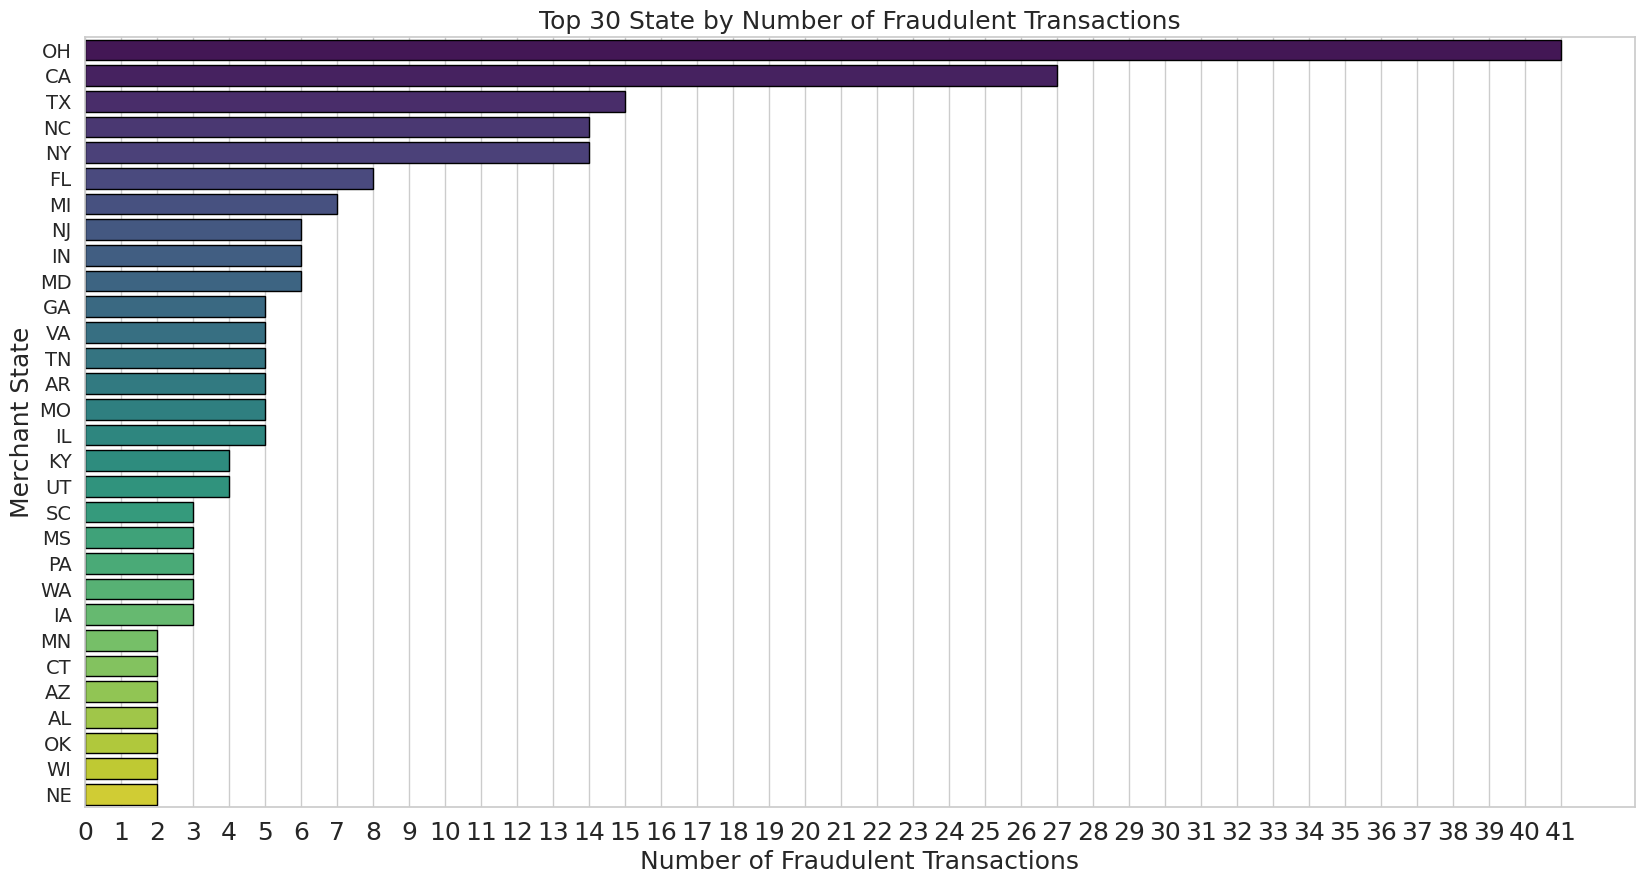

In [ ]:
top_cities = fraud_data['Merchant State'].value_counts().head(30).index

plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

sns.countplot(data=fraud_data, y='Merchant State', order=top_cities, edgecolor='black', palette='viridis')

plt.title('Top 30 State by Number of Fraudulent Transactions', fontsize=18)
plt.xlabel("Number of Fraudulent Transactions", fontsize=18)
plt.ylabel("Merchant State", fontsize=18)

max_value = fraud_data['Merchant State'].value_counts().max()
plt.xticks(range(0, max_value + 1, 1), fontsize=18)

plt.yticks(fontsize=14)
plt.show()


In [ ]:
new_data['Errors?'].unique()

array(['Technical Glitch', 'Insufficient Balance', 'Bad PIN',
       'Bad PIN,Insufficient Balance', 'Bad PIN,Technical Glitch',
       'Bad Zipcode', 'Insufficient Balance,Technical Glitch',
       'Bad Zipcode,Insufficient Balance', 'Bad Zipcode,Technical Glitch',
       'Bad CVV', 'Bad Expiration', 'Bad Card Number',
       'Bad Card Number,Insufficient Balance'], dtype=object)

In [ ]:
new_data.groupby('Errors?')['Is Fraud?'].value_counts()

Errors?                                Is Fraud?
Bad CVV                                0                 4
Bad Card Number                        0                 3
Bad Card Number,Insufficient Balance   0                 1
Bad Expiration                         0                 1
Bad PIN                                0             58209
                                       1               139
Bad PIN,Insufficient Balance           0               570
                                       1                 6
Bad PIN,Technical Glitch               0               127
                                       1                 1
Bad Zipcode                            0              2079
Bad Zipcode,Insufficient Balance       0                13
Bad Zipcode,Technical Glitch           0                 7
Insufficient Balance                   0            220675
                                       1                65
Insufficient Balance,Technical Glitch  0               423
Technical Glitch                       0             42513
                                       1                 8
Name: count, dtype: int64

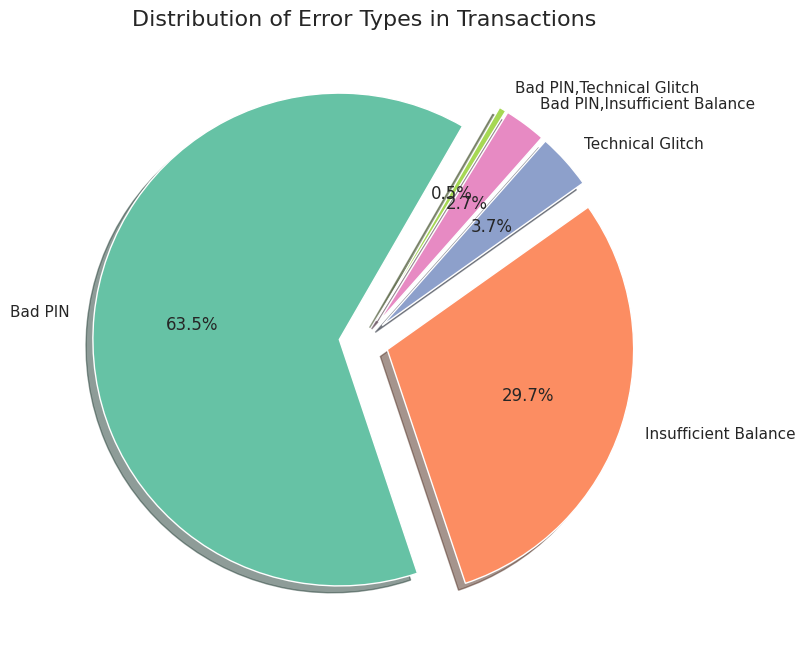

In [ ]:
error_counts = fraud_data['Errors?'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(error_counts, labels=error_counts.index, autopct='%1.1f%%', startangle=60, colors=sns.color_palette("Set2"), explode=[0.1]*len(error_counts), shadow=True)

plt.title('Distribution of Error Types in Transactions', fontsize=16)
plt.show()

In [ ]:
new_data.drop(['User', 'Card'], axis=1, inplace=True)

In [ ]:
new_data.head()

,Year,Month,Day,Time,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,2002,9,9,09:40,65.50,Swipe Transaction,La Verne,CA,91750.0,7538,Technical Glitch,0
1,2002,9,12,06:21,122.10,Swipe Transaction,La Verne,CA,91750.0,5411,Insufficient Balance,0
2,2002,9,17,06:09,120.19,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0
3,2002,9,20,06:01,104.77,Swipe Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,0
4,2002,9,29,06:06,119.61,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0


In [ ]:
# Feature extraction: Extarct Hours and Minutes from Time column
new_data['Hours'] = new_data['Time'].str[0:2]
new_data['Minutes'] = new_data['Time'].str[3:5]

new_data.insert(3, 'Hours', new_data.pop('Hours'))
new_data.insert(4, 'Minutes', new_data.pop('Minutes'))

In [ ]:
new_data.drop('Time', axis=1, inplace=True)

In [ ]:
new_data.head()

,Year,Month,Day,Hours,Minutes,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,2002,9,9,09,40,65.50,Swipe Transaction,La Verne,CA,91750.0,7538,Technical Glitch,0
1,2002,9,12,06,21,122.10,Swipe Transaction,La Verne,CA,91750.0,5411,Insufficient Balance,0
2,2002,9,17,06,09,120.19,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0
3,2002,9,20,06,01,104.77,Swipe Transaction,La Verne,CA,91750.0,5311,Insufficient Balance,0
4,2002,9,29,06,06,119.61,Swipe Transaction,La Verne,CA,91750.0,5912,Insufficient Balance,0


In [ ]:
# Convert data type
new_data['Hours'] = new_data['Hours'].astype('int')
new_data['Minutes'] = new_data['Minutes'].astype('float')

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324844 entries, 0 to 324843
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            324844 non-null  int64  
 1   Month           324844 non-null  int64  
 2   Day             324844 non-null  int64  
 3   Hours           324844 non-null  int64  
 4   Minutes         324844 non-null  float64
 5   Amount          324844 non-null  float64
 6   Use Chip        324844 non-null  object 
 7   Merchant City   324844 non-null  object 
 8   Merchant State  324844 non-null  object 
 9   Zip             324844 non-null  float64
 10  MCC             324844 non-null  int64  
 11  Errors?         324844 non-null  object 
 12  Is Fraud?       324844 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 32.2+ MB


In [ ]:
# make a label encoder for these columns
columns = ['Use Chip',  'Merchant City', 'Merchant State', 'Errors?']
le = LabelEncoder()
for col in columns:
    new_data[col] = le.fit_transform(new_data[col])

In [ ]:
new_data.head()

,Year,Month,Day,Hours,Minutes,Amount,Use Chip,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,2002,9,9,9,40.0,65.50,1,3248,4,91750.0,7538,12,0
1,2002,9,12,6,21.0,122.10,1,3248,4,91750.0,5411,10,0
2,2002,9,17,6,9.0,120.19,1,3248,4,91750.0,5912,10,0
3,2002,9,20,6,1.0,104.77,1,3248,4,91750.0,5311,10,0
4,2002,9,29,6,6.0,119.61,1,3248,4,91750.0,5912,10,0


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324844 entries, 0 to 324843
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            324844 non-null  int64  
 1   Month           324844 non-null  int64  
 2   Day             324844 non-null  int64  
 3   Hours           324844 non-null  int64  
 4   Minutes         324844 non-null  float64
 5   Amount          324844 non-null  float64
 6   Use Chip        324844 non-null  int64  
 7   Merchant City   324844 non-null  int64  
 8   Merchant State  324844 non-null  int64  
 9   Zip             324844 non-null  float64
 10  MCC             324844 non-null  int64  
 11  Errors?         324844 non-null  int64  
 12  Is Fraud?       324844 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 32.2 MB


In [ ]:
# Defining Features and Target Variables
x = new_data.drop('Is Fraud?', axis=1)
y = new_data['Is Fraud?']

In [ ]:
print('Shape of X: ', x.shape)
print('Shape of Y: ', y.shape)

Shape of X:  (324844, 12)
Shape of Y:  (324844,)


In [ ]:
smote = SMOTE(random_state=32)
x_res, y_res = smote.fit_resample(x, y)

print(f'Original dataset shape {Counter(y)}')
print(f"Resampled dataset shape: {Counter(y_res)}")

Original dataset shape Counter({0: 324625, 1: 219})
Resampled dataset shape: Counter({0: 324625, 1: 324625})


In [ ]:
# Splitting the Data and Scaling
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=32)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Model Architecture

In [ ]:
from sklearn import metrics
from sklearn.metrics import  classification_report

In [ ]:
# # Logistic Regression
# log_model = LogisticRegression()
# log_model.fit(x_train, y_train)
# y_pred = log_model.predict(x_test)

# print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))
# print('precision : ', metrics.precision_score(y_test, y_pred))
# print('Recall : ', metrics.recall_score(y_test, y_pred))

# conf_matrix = metrics.confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(7, 5))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Fraud', 'not Fraud'],
#             yticklabels=['Fraud', 'not Fraud'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix for Logistic Regression')
# plt.show()

In [ ]:
# print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy :  0.9462533692722372
precision :  0.9379962192816635
Recall :  0.9556421792185381


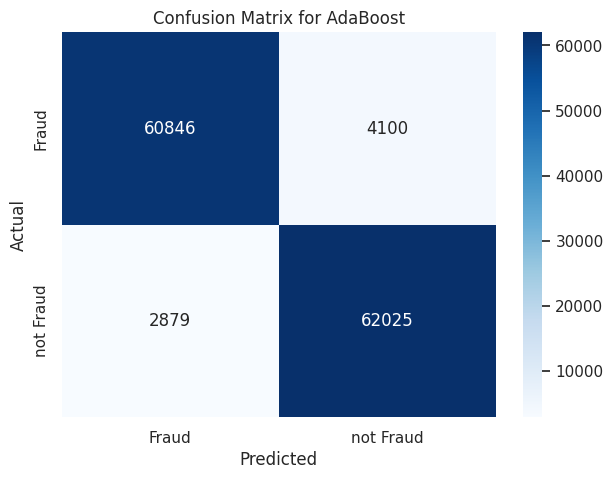

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
Ada_boost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    learning_rate=0.5,
    random_state=42
)

Ada_boost.fit(x_train, y_train)

predict = Ada_boost.predict(x_test)

print('Accuracy : ', metrics.accuracy_score(y_test, predict))
print('precision : ', metrics.precision_score(y_test, predict))
print('Recall : ', metrics.recall_score(y_test, predict))

conf_matrix = metrics.confusion_matrix(y_test, predict)
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fraud', 'not Fraud'],
            yticklabels=['Fraud', 'not Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

In [ ]:
print(f"Classification Report:\n{classification_report(y_test, predict)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     64946
           1       0.94      0.96      0.95     64904

    accuracy                           0.95    129850
   macro avg       0.95      0.95      0.95    129850
weighted avg       0.95      0.95      0.95    129850



In [ ]:
y_test

,Is Fraud?
507803,1
385855,1
419288,1
133369,0
78305,0
...,...
195110,0
450661,1
96439,0
105589,0


In [ ]:
predict

array([1, 1, 1, ..., 0, 0, 0])